#UNIT 11 대중교통 데이터 시각화하기

##1.대중교통 데이터 내려 받기
먼저 수도권 대중 교통 데이터는 국가 기관이 아닌 티머니 홈페이지에서 제공합니다.
\[[티머니 홈페이지](https://www.t-money.co.kr)\]에 접속한 후 **이용안내**를 선택합니다.  

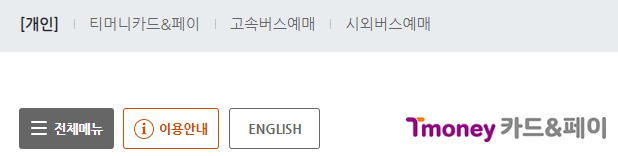  

"이용 안내 메인" 창에서 "**대중교통 통계자료**"를 선택합니다.  
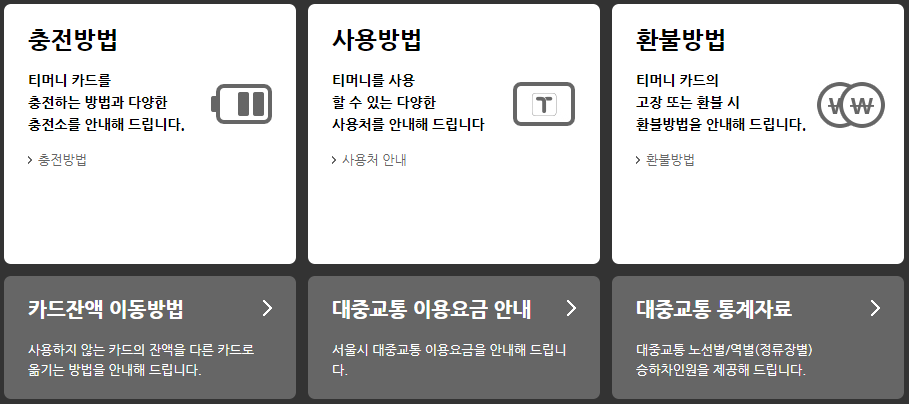  


그리고 "**20xx년 xx월 교통카드 통계자료**"를 다운로드 받습니다.


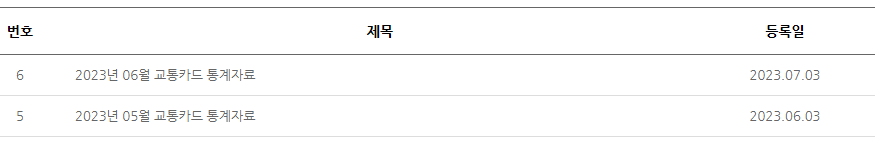  
다운로드 받은 파일을 더블 클릭하여 excel로 열어서 내용을 살펴보겠습니다.


다운로드 받은 파일에는 4개의 탭이 있는데 각각 "버스정류장별 이용현황", "지하철 노선별 역별 이용현황", "지하철 유무임별 이용현황", "지하철 시간대별 이용현황"으로 sheet가 나누어져 있습니다.

##2. 지하철 유무임별 이용현황 데이터 정제하기(데이터 전처리)
다운로드 받은 파일을 보면 4개의 탭이 있고 그중에 "지하철 유무임별 이용현황" 탭이 있습니다.
- 단계 1 : 다른 이름(subway)으로 저장하기를 아래와 같이 하십시요.

<center>

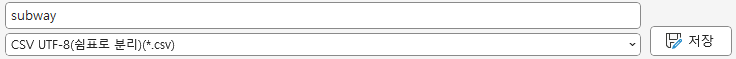
</center>

- 단계 2 : '작업 일시' 열을 삭제하십시요. 우리는 이 열의 데이터를 사용하지 않을 것이기 때문입니다.
- 단계 3 : 유임승차, 유임하차, 무임승차, 무임하차 열에 해당하는 셀의 속성을 **일반**로 변경하세요. 의도는 정수를 표현하면서 자릿수를 구분하기 위한 쉼표(,)를 제거 하기 위해서 입니다. 그리고 파일을 다시 저장하세요.

<center>

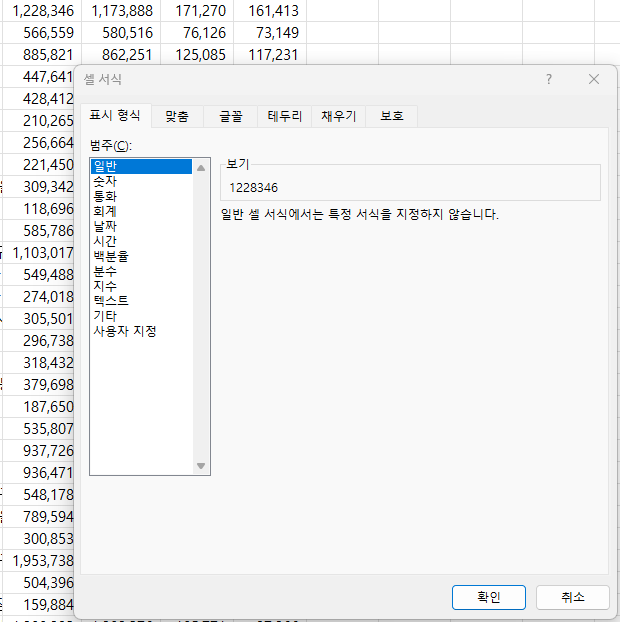

</center>

In [1]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [7]:
import csv

f = open('./drive/MyDrive/data_files/subway.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  print(row)

f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Dec-23', '1호선', '150', '서울역', '1442704', '1404121', '211843', '203808']
['Dec-23', '1호선', '151', '시청', '696784', '684254', '99882', '98107']
['Dec-23', '1호선', '152', '종각', '1010849', '985165', '162696', '152064']
['Dec-23', '1호선', '153', '종로3가', '488467', '450427', '310689', '286850']
['Dec-23', '1호선', '154', '종로5가', '483866', '476917', '246504', '239266']
['Dec-23', '1호선', '155', '동대문', '236114', '228110', '128542', '127639']
['Dec-23', '1호선', '156', '신설동', '289402', '276992', '120282', '116775']
['Dec-23', '1호선', '157', '제기동', '231358', '219338', '256218', '272510']
['Dec-23', '1호선', '158', '청량리(서울시립대입구)', '380606', '372443', '274847', '276209']
['Dec-23', '1호선', '159', '동묘앞', '144443', '150931', '146515', '148571']
['Dec-23', '2호선', '201', '시청', '697558', '629317', '61727', '56189']
['Dec-23', '2호선', '202', '을지로입구', '1399572', '1418244', '119872', '110914']
['Dec-23', '2호선', '203', '을지로3가', '649983', '636802', '78399', 

출력 결과를 살펴보니 맨 첫줄에 헤더(header) 데이터가 들어 있습니다.

```python
['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
```

In [9]:
f = open('./drive/MyDrive/data_files/subway.csv', encoding='cp949')
data = csv.reader(f)
# header 분리
header = next(data)
# data를 리스트 형 데이터로 변경
data = list(data)
f.close()

In [17]:
%page header

In [13]:
%page data

출력 결과를 살펴 보니 ```row```는 리스트형 데이터이고 이 리스트의 각 요소는 문자열 데이터인 것을 확인할 수 있습니다. 이 리스트의 인덱스 4부터 7까지는 숫자이므로 정수로 변환을 해야겠습니다.

In [14]:
for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])

In [15]:
debug_data = data[:5]
%page debug_data

리스트 형 데이터의 각 요소의 의미를 확인하게 위해, 해더 정보를 다시 확인하겠습니다.


```python
['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
```

무임승차라.... 2023년 1월(Jan-23) 가장 무임승차를 많이 한 역은 어디일까요?

##3. 유임승차 비율이 가장 높은 역은 어디일까요?
이제 이 데이터에서 어떤 정보를 가져올 수 있을지 생각해 보겠습니다. 유임 승차 비율이 가장 높은 또는 가장 낮은 역이 어디인지 궁금하네요. 무임 승차 인원 대비 유임승차 인원의 비율이 얼마나 되는지 생각할 수 있을 것입니다. 예를 들어 10명의 유임 승차를 했고 4명이 무임 승차를 했다면 무임 승차 인원 대비 유임 승차 인원의 비율은 무임 승차 인원의 2.5배(10/4)가 됩니다. 이와 같은 방식으로 유임승차율을 식(11-1)과 같이 정의하겠습니다.

$$유임 승차 인원의 비율 = 유임승차인원/무임승차인원 \tag{식 11-1}$$


그렇다면 이제 어떤 작업부터 해야하는지 생각해 보겠습니다.

1. 테이터를 읽어 온다.
2. 필요시 데이터를 정제(데이터 전처리)를 한다.
3. 모든 역의 데이터를 바탕으로 각 역의 유임승 인원의 비율을 구한다.
4. 이 비율이 가장 높은 역의 이름과 비율을 출력한다.
5. 적절한 시각화 방법으로 보고서에 들어갈 그래프를 그린다.




---


In [19]:
rate =[]
for row in data:
  rate.append( row[4]/row[6] )

ZeroDivisionError: division by zero

In [23]:
rate =[]
name_station = []
for row in data:
  try:
    rate.append( row[4]/row[6] )
    name_station.append( row[3] )
  except ZeroDivisionError:
    print('Exception(ZeroDivisionError) - ', row[3]+':',row[6])

Exception(ZeroDivisionError) -  지축: 0
Exception(ZeroDivisionError) -  김포공항: 0
Exception(ZeroDivisionError) -  신내: 0
Exception(ZeroDivisionError) -  춘의: 0
Exception(ZeroDivisionError) -  신중동: 0
Exception(ZeroDivisionError) -  굴포천: 0


In [25]:
max_rate = max(rate)
name = name_station[rate.index(max_rate)]

print(f'유임승차인원의 비율이 가장 높은 역은 {name}이고 비율은 {max_rate}입니다.')

유임승차인원의 비율이 가장 높은 역은 충무로이고 비율은 32.5입니다.


---

앞서 정의한 유임 승차 인원 비율과 다르게 전체 이용자에 대한 유임 승차 인원 비율를 정의하겠습니다

유임 승차 인원 비율 = 유임 승차 인원 / 전체(무임 + 유임) 승차 인원

그리고 이용객 수가 100,000명 이상인 역을 대상으로만 유임 승차 인원 비율을 조사하겠습니다.

In [35]:
rate =[]
name_station = []
for row in data:
  if row[6] != 0:
    rate.append( row[4]/(row[4] + row[6]) )
    name_station.append( row[3] )

max_rate = max(rate)
name = name_station[rate.index(max_rate)]

print(f'유임승차인원의 비율이 가장 높은 역은 {name}이고 비율은 {max_rate}입니다.')

유임승차인원의 비율이 가장 높은 역은 충무로이고 비율은 0.9701492537313433입니다.


유임 승차인원의 비율이 94% 이상인 역 이름과 비율을 출력해 보면 다음과 같습니다.

In [36]:
for rate, name in zip(rate, name_station):
  if rate >= 0.94:
    print('{}(역)의 유임 승차 인원의 비율은 {:.2}입니다'.format(name, rate))

한양대(역)의 유임 승차 인원의 비율은 0.96입니다
홍대입구(역)의 유임 승차 인원의 비율은 0.95입니다
충무로(역)의 유임 승차 인원의 비율은 0.97입니다
서울역(역)의 유임 승차 인원의 비율은 0.94입니다
한강진(역)의 유임 승차 인원의 비율은 0.94입니다
홍대입구(역)의 유임 승차 인원의 비율은 0.96입니다
마곡나루(서울식물원)(역)의 유임 승차 인원의 비율은 0.94입니다


---

In [41]:
rate =[]
name_station = []
lines =[]
for row in data:
  if row[6] != 0:
    rate.append( row[4]/(row[4] + row[6]) )
    name_station.append( row[3] )
    lines.append(row[1])

max_rate = max(rate)
idx = rate.index(max_rate)
name = name_station[idx]
line = lines[idx]

print(f'유임승차인원의 비율이 가장 높은 역은 {name} {line}이고 비율은 {max_rate}입니다.')

유임승차인원의 비율이 가장 높은 역은 충무로 3호선이고 비율은 0.9701492537313433입니다.


In [47]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.3 MB/s eta 0:00:00


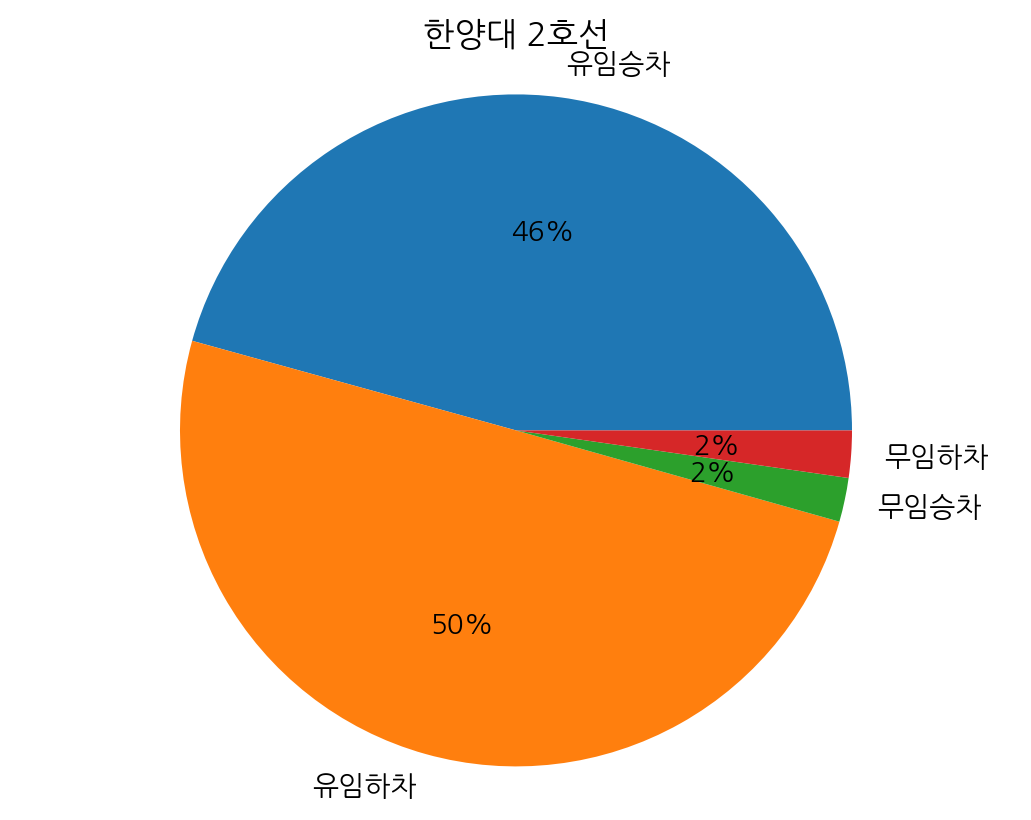

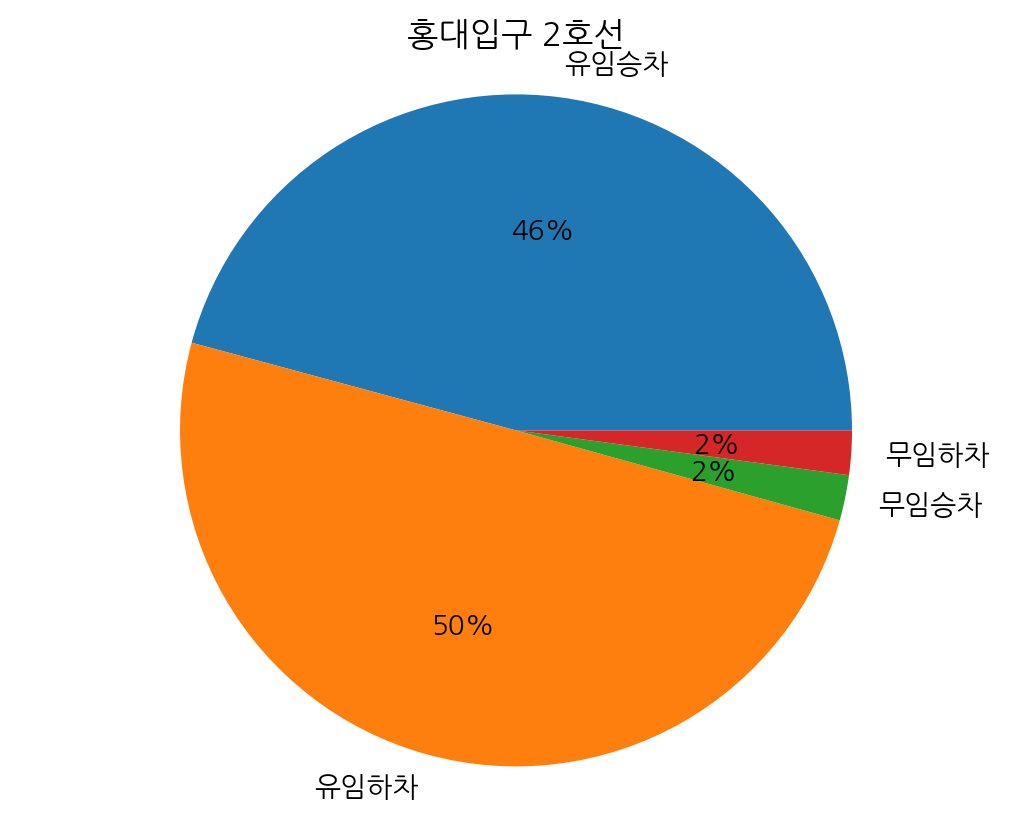

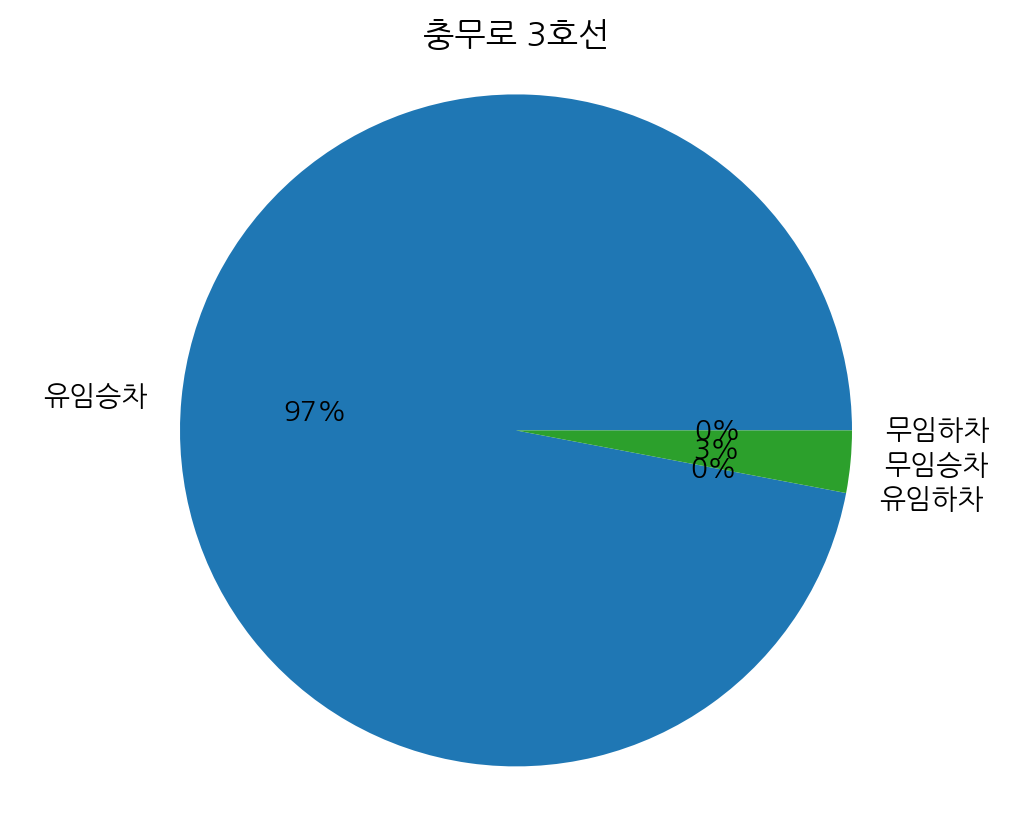

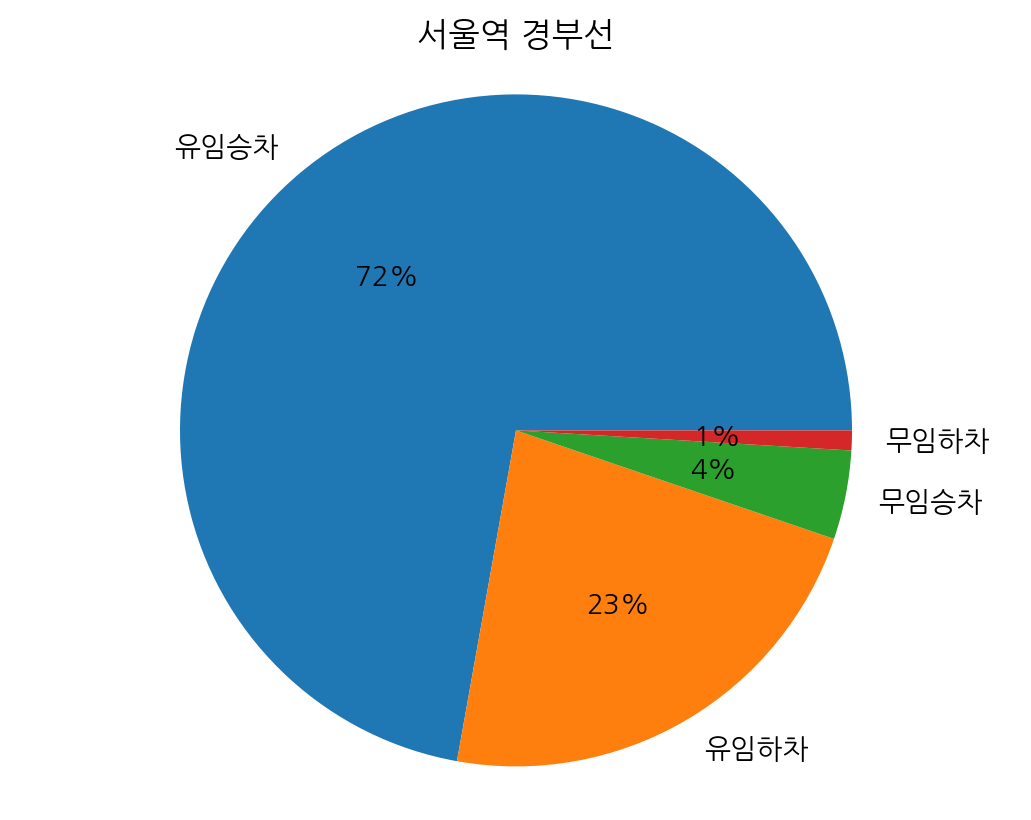

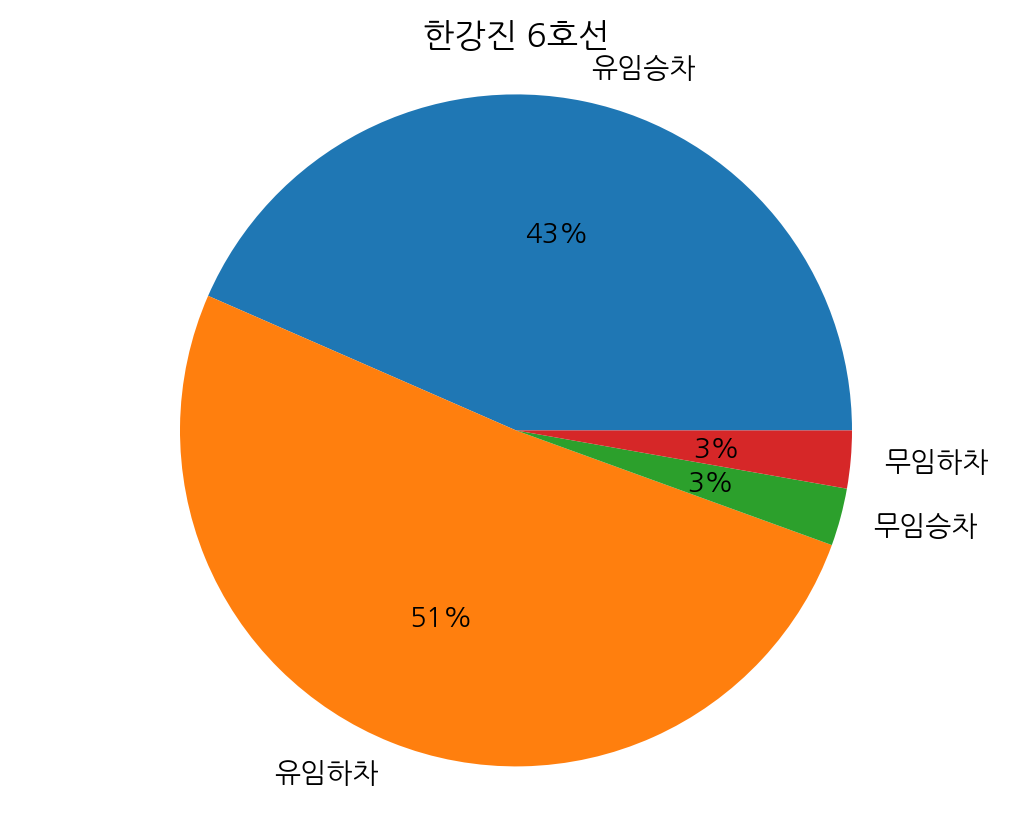

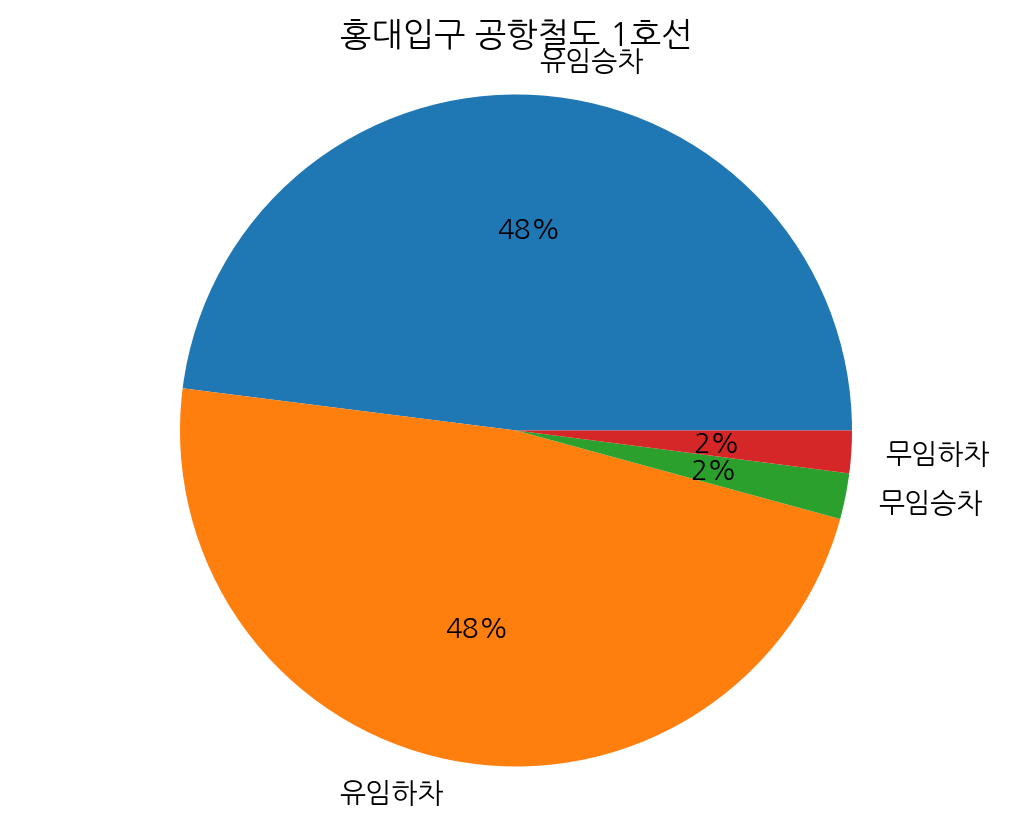

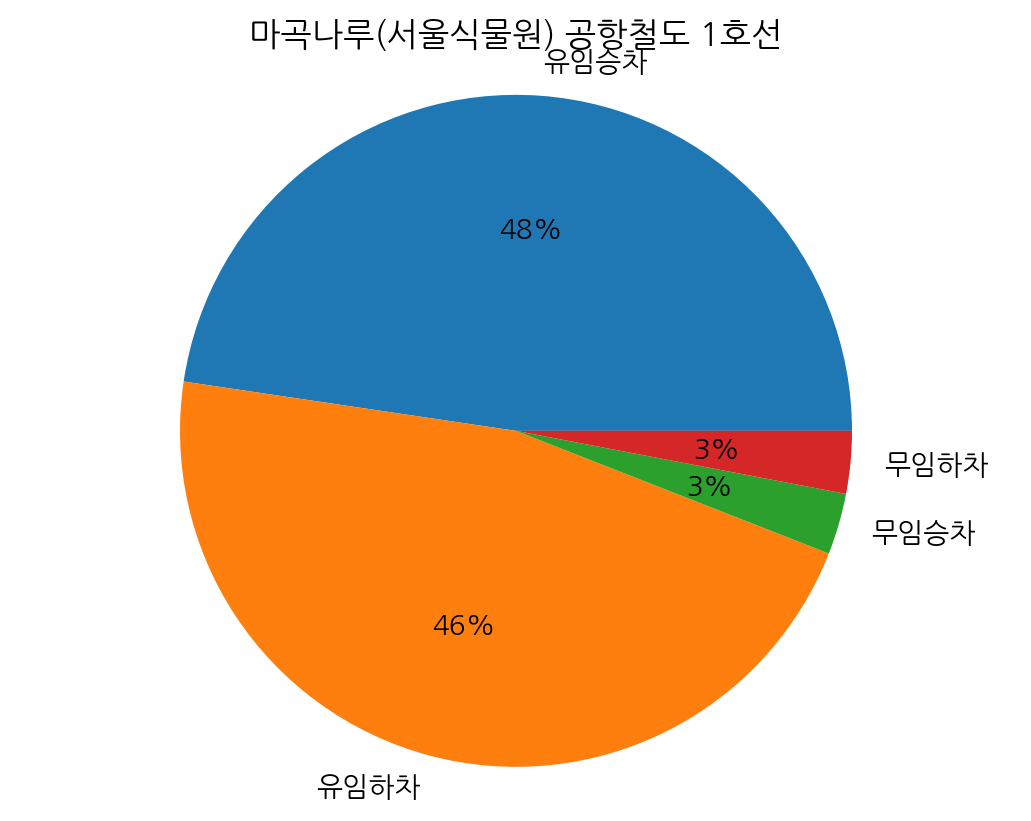

In [52]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plot_pie_chart(name, line, data):
  label = ['유임승차', '유임하차', '무임승차' ,'무임하차']
  plt.figure(dpi=200)
  plt.title(name+' '+line)
  plt.pie(data, labels=label, autopct='%1.f%%')
  plt.axis('equal')
  plt.savefig(name+' '+line + '.png')
  plt.show()

# ['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
for row in data:
  if row[6] != 0:
    rate = row[4]/(row[4] + row[6])
    if rate >= 0.94:
      plot_pie_chart(row[3], row[1], row[4:])


#UNIT 12 지하철 시간대별 데이터 시각화하기

In [54]:
# 파일에서 데이터 읽어 오기
f = open('./drive/MyDrive/data_files/subwaytime.csv')
data = csv.reader(f)

# header 분리
header = next(data)

# data를 리스트 형 데이터로 변경
data = list(data)
f.close()

In [56]:
# header 확인
print(header)

['\ufeff사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']


subwaytime.csv 파일을 보면 헤더가 두 줄인 것을 확인할 수 있습니다. 따라서 `data` 리스트의 첫 번째 요소에 header가 포함되어 있을 것입니다.

In [57]:
header = data[0]
print(header)

['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']


`data`의 0 인덱스 위치에 있는 header 내용을 제거 하도록 하겠습니다.

In [58]:
data = data[1:]

In [60]:
print(data[0])

['Dec-23', '1호선', '150', '서울역', '700', '35', '7812', '8436', '12190', '50415', '37075', '105313', '68020', '218007', '67218', '160369', '65860', '86649', '87205', '81378', '99445', '93380', '98032', '93064', '81738', '83771', '112561', '90559', '123825', '93455', '182378', '104337', '214755', '101935', '119593', '74342', '89409', '54361', '91804', '51756', '61927', '34379', '29690', '15733', '3170', '4088', '140', '1884', '0', '283', '0', '0']


승차, 하차 인원 수가 문자열로 기록되어 있음. 따라서 정수로 변경해야합니다.

In [61]:
for row in data:
  row[4:] = map(int, row[4:])

In [63]:
row = data[0]
%page row

아침 7시대(07:00:00~07:59:59)에 승차인원 정보는 10번 인덱스 열에 있음.


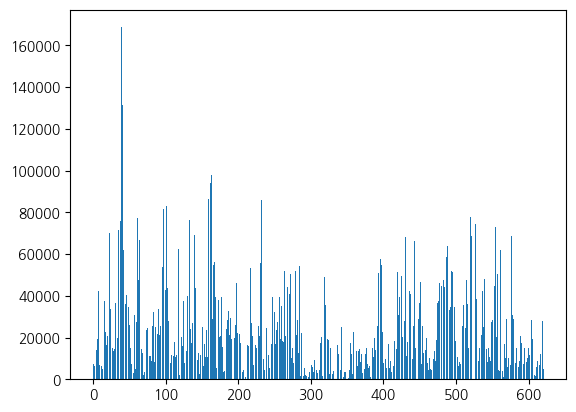

In [82]:
npeople_get_on =[]

for row in data:
  npeople_get_on.append(row[10])

import matplotlib.pyplot as plt

plt.bar(range(len(npeople_get_on)), npeople_get_on)
plt.show()

위 그래프는 아침 7시대에 탑승하는 인원의 수를 역별로 그린 것입니다. 역 별로 탑승 인원의 수가 차이가 많이 난다는 것을 알 수 있습니다.

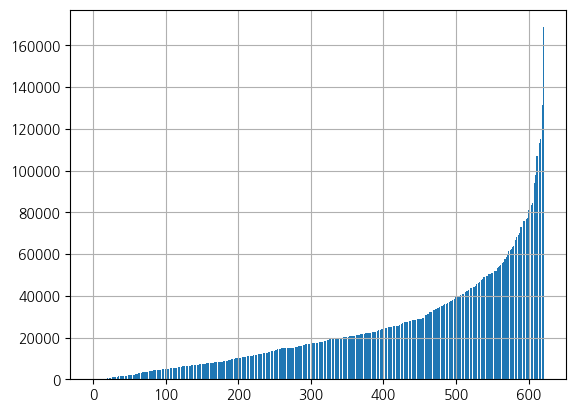

In [92]:
npeople_get_on.sort()

plt.bar(range(len(npeople_get_on)), npeople_get_on)
plt.grid()
plt.show()

그래프을 육안으로 봤을 때 아침 7시대 1개의 역에서 무척 많은 사람이 탑승을 한다는 것을 알 수 있습니다. 40,000명 이상 탑승하는 역도 100군데 이상이군요.

In [90]:
lst

[1, 2, 2, 2, 3, 4]

---

### 스스로 해보기
아침 07:00:00~08:59:59 시간대에 역 별로 지하철 탑승 객의 수를 bar 차트로 그리시오.

In [95]:
npeople_get_on =[]
for row in data:
  npeople_get_on.append(sum(row[10:15:2]))

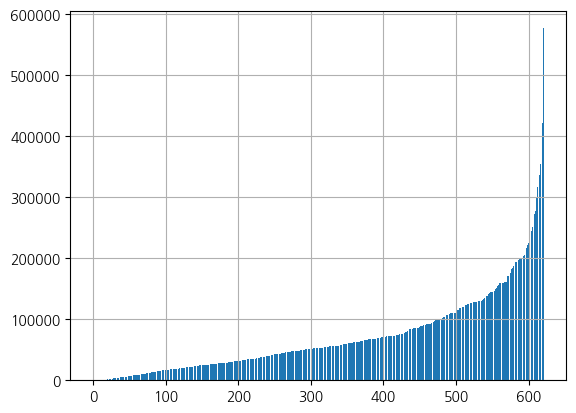

In [96]:
npeople_get_on.sort()
plt.bar(range(len(npeople_get_on)), npeople_get_on)
plt.grid()
plt.show()

### 스스로 해보기
아침 07:00:00~08:59:59 시간대에 역 별로 지하철 탑승 객의 수가 300,000명 이상인 역 이름과 인원 수 출력

In [97]:
# ['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']

names =[]
npeople =[]

for row in data:
  total = sum(row[10:15:2])
  if total >= 300000:
    names.append(row[3]+row[1])
    npeople.append(total)

for name, n in zip(names, npeople):
  print(name+':', n)

잠실(송파구청)2호선: 383375
서울대입구(관악구청)2호선: 388359
신림2호선: 576994
구로디지털단지2호선: 420910
신도림2호선: 354649
연신내3호선: 330993
쌍문4호선: 316978
화곡5호선: 323435
까치산5호선: 337281


## 아침 출근 시간대에 가장 많은 사람이 하차하는 역은?

In [113]:
# ['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
names =[]
npeople =[]

for row in data:
  total = sum(row[11:16:2])
  if total >= 400000:
    names.append(row[3]+'\n'+row[1])
    npeople.append(total)

for name, n in zip(names, npeople):
  print(name+':', n)

서울역
1호선: 483689
종각
1호선: 491830
을지로입구
2호선: 595862
성수
2호선: 448350
잠실(송파구청)
2호선: 441184
삼성(무역센터)
2호선: 658911
선릉
2호선: 576660
역삼
2호선: 721797
강남
2호선: 702035
구로디지털단지
2호선: 409566
양재(서초구청)
3호선: 426364
여의도
5호선: 416634
광화문(세종문화회관)
5호선: 450415
가산디지털단지
7호선: 686146


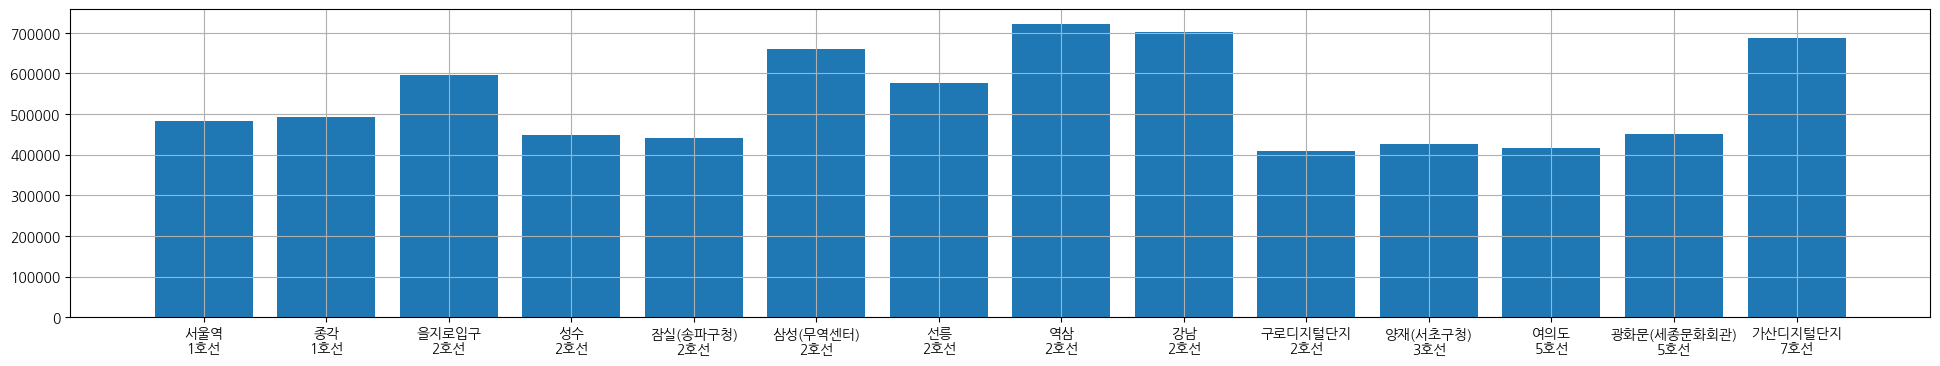

In [112]:
plt.figure(figsize=[24, 4])
plt.bar(names, npeople)
plt.grid()
plt.show()

서울역1호선: 483689
종각1호선: 491830
을지로입구2호선: 595862
성수2호선: 448350
잠실(송파구청)2호선: 441184
삼성(무역센터)2호선: 658911
선릉2호선: 576660
역삼2호선: 721797
강남2호선: 702035
구로디지털단지2호선: 409566
양재(서초구청)3호선: 426364
여의도5호선: 416634
광화문(세종문화회관)5호선: 450415
가산디지털단지7호선: 686146


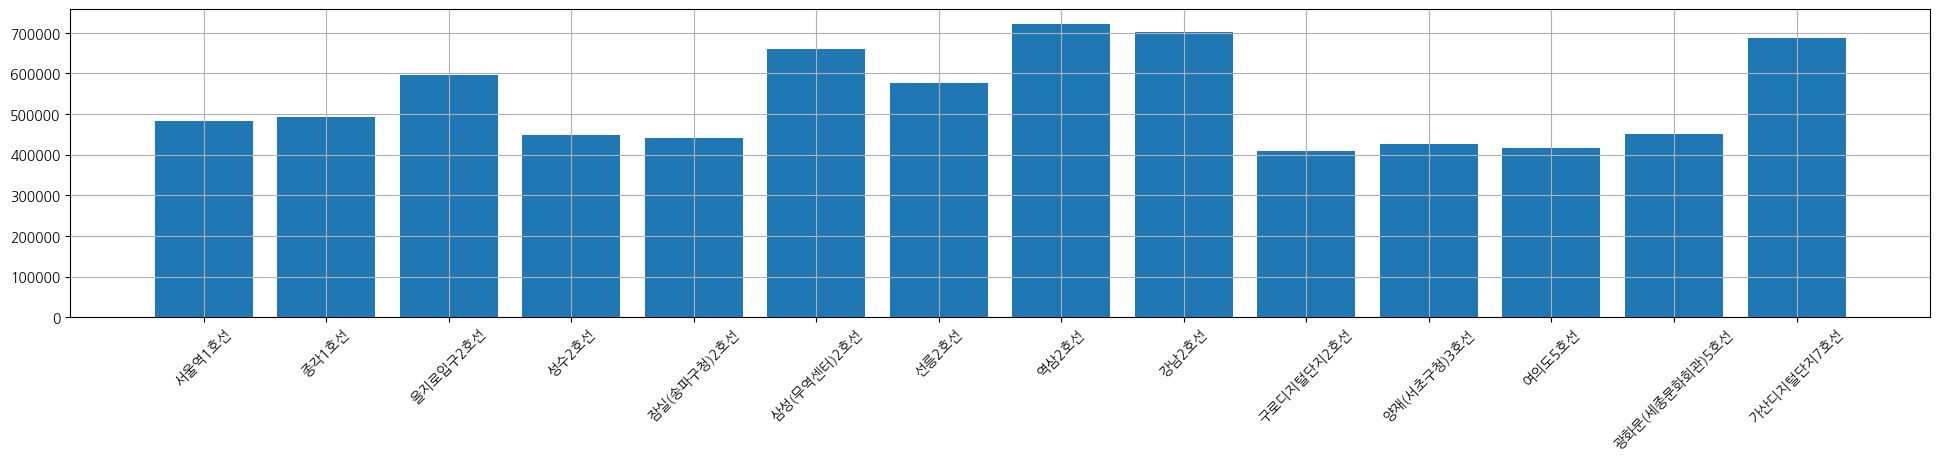

In [118]:
# ['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
names =[]
npeople =[]

for row in data:
  total = sum(row[11:16:2])
  if total >= 400000:
    names.append(row[3]+row[1])
    npeople.append(total)

for name, n in zip(names, npeople):
  print(name+':', n)

plt.figure(figsize=[24, 4])
plt.bar(names, npeople)
plt.xticks(range(len(names)), names, rotation=45)
plt.grid()
plt.show()